# Real Estate Investment Data Analysis for Izmir/Turkey
In this personal project python is used for web scraping, data wrangling, data cleaning, and basic analysis
## Web Scraping

In [2]:
# Installing Necessary Packages
!pip install beautifulsoup4
!pip install requests
!pip install os_sys   
!pip install pandas
!pip install numpy
!pip pip install google-cloud-bigquery
!pip install SQLAlchemy
!pip install xlsxwriter
!pip install matplotlib
!pip install seaborn
!pip install sorting

  Using cached os_sys-2.1.4-py3-none-any.whl (15.6 MB)
  Using cached pypiwin32-223-py3-none-any.whl (1.7 kB)
  Using cached geocoder-1.38.1-py2.py3-none-any.whl (98 kB)
  Using cached cefpython3-66.0-py2.py3-none-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (67.8 MB)
  Using cached mysql-connector-2.2.9.tar.gz (11.9 MB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.4 MB/s eta 0:00:00a 0:00:010m
  Using cached python_dateutil-2.7.5-py2.py3-none-any.whl (225 kB)
  Using cached selenium-4.1.2-py3-none-any.whl (963 kB)
  Using cached psutil-5.9.0-cp39-cp39-macosx_10_9_x86_64.whl (238 kB)
  Using cached os_sys_php-2019.10.13-py3-none-any.whl (38.6 MB)
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached Django-4.0.3-py3-none-any.whl (8.0 MB)
  Using cached pynput-1.7.6-py2.py3-none-any.whl (89 kB)
  Using cached os_sys-2.1.3-py3-none-any.whl (15.5 MB)
  Using cached os_sys

In [2]:
#Importing the packages
import csv
from bs4 import BeautifulSoup
import requests
import os
import pandas as pd
import sys
import numpy as np
import xlsxwriter
import matplotlib.pyplot as plt
import seaborn as sns
import sorting
from google.cloud import bigquery
from google.cloud.exceptions import NotFound
from sqlalchemy import create_engine

In [15]:
#Google Bigquery Access Credentials
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/alidemir/PycharmProjects/SahibindenScraping/local-incline-341518-9c228098b101.json"

## Web Scraping Note:
This all scraping script must be in the same code area because of not overwriting the same rows when using the script again

### Rent Scraping

In [ ]:
# Creating CSV file for rent ads and defining titles
with open("rent.csv", "w", encoding="utf8", newline="") as f:
    thewriter= csv.writer(f)
    header = ["Title", "Location", "Price", "MeterSquare", "Number of Rooms", "Age", "Ad Date", "Condition"]
    thewriter.writerow(header)
    
# User agent for requests
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3 Safari/605.1.15"}

#Defining web scraping function
def getRent(page):
    url = f"https://www.hepsiemlak.com/izmir-kiralik/daire?p37=120406&page={page}"
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")
    lists = soup.find_all("div", class_="listing-item")



    with open("rent.csv", "a", encoding="utf8", newline="") as f:

        thewriter= csv.writer(f)


        for list in lists:
            title = list.find("div", class_="list-view-header").text.replace("\n","")
            location = list.find("div", class_="list-view-location").text.replace("\n","")
            price = list.find("div", class_="list-view-price").text.replace("\n","")
            metersquare = list.find("span", class_="celly squareMeter list-view-size").text.replace("\n","")
            ad_date = list.find("div", class_="list-view-date").text.replace("\n","")
            room_number = list.find("span", class_="celly houseRoomCount").text.replace("\n","")
            age= list.find("span", class_="celly buildingAge").text.replace("\n","")
            condition = list.find("div", class_="left").text.replace("\n","")

            info = [title, location, price, metersquare, room_number, age, ad_date, condition]
            thewriter.writerow(info)
        return

#Number of pages that is wanted to scrape and writing the data into csv file
for x in range(1,61):
    getRent(x)

### Sale Scraping

In [ ]:
## Same script for Sale data

with open("sale.csv", "w", encoding="utf8", newline="") as f:
    thewriter= csv.writer(f)
    header = ["Title", "Location", "Price", "MeterSquare", "Number of Rooms", "Age", "Ad Date", "Condition"]
    thewriter.writerow(header)

headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3 Safari/605.1.15"}

def getRent(page):
    url = f"https://www.hepsiemlak.com/izmir-satilik/daire?p37=120406&page={page}"
    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.content, "html.parser")
    lists = soup.find_all("div", class_="listing-item")



    with open("sale.csv", "a", encoding="utf8", newline="") as f:

        thewriter= csv.writer(f)


        for list in lists:
            title = list.find("div", class_="list-view-header").text.replace("\n","")
            location = list.find("div", class_="list-view-location").text.replace("\n","")
            price = list.find("div", class_="list-view-price").text.replace("\n","")
            metersquare = list.find("span", class_="celly squareMeter list-view-size").text.replace("\n","")
            ad_date = list.find("div", class_="list-view-date").text.replace("\n","")
            room_number = list.find("span", class_="celly houseRoomCount").text.replace("\n","")
            age= list.find("span", class_="celly buildingAge").text.replace("\n","")
            condition = list.find("div", class_="left").text.replace("\n","")

            info = [title, location, price, metersquare, room_number, age, ad_date, condition]
            thewriter.writerow(info)
        return

for x in range(1,258):
    getRent(x)

## Data Cleaning

In [3]:
# Data merging
df_1 = pd.read_csv("rent.csv")
df_2 = pd.read_csv("sale.csv")
df = pd.concat([df_1, df_2], ignore_index=True)
df

,Title,Location,Price,MeterSquare,Number of Rooms,Age,Ad Date,Condition
0,"karşıyaka nergiz de,izba...","Karşıyaka, ...",3.500 TL,100 m2,2 + 1,9 Yaşında,3 Mart 2022,Kiralık ...
1,"bornova,kazımdirik,plaza...","Bornova, ...",5.000 TL,100 m2,2 + 1,8 Yaşında,4 Şubat 2022,Kiralık ...
2,nurfen’den bahçelievlerd...,"Karabağlar, ...",2.300 TL,135 m2,3 + 1,20 Yaşında,25 Ocak 2022,Kiralık ...
3,sahibinden izka -port ku...,"Bayraklı, ...",8.000 TL,98 m2,1 + 1,Sıfır Bina,11 Ocak 2022,Kiralık ...
4,karşıyaka zübeyde hanım ...,"Karşıyaka, ...",3.250 TL,128 m2,3 + 1,24 Yaşında,5 Mart 2022,Kiralık ...
...,...,...,...,...,...,...,...,...
7581,a24 site ; narlıdere sa...,"Narlıdere, ...",5.950.000 TL,180 m2,3 + 1,Sıfır Bina,17 Şubat 2022,Satılık ...
7582,evka 5'de site içinde 3+...,"Çiğli, ...",1.530.000 TL,145 m2,3 + 1,8 Yaşında,9 Şubat 2022,Satılık ...
7583,esenlik mh. 115 m2 3+1 p...,"Karabağlar, ...",459.000 TL,115 m2,3 + 1,25 Yaşında,29 Ocak 2022,Satılık ...
7584,a24 site; narlıdere satı...,"Narlıdere, ...",6.000.000 TL,265 m2,4 + 1,Sıfır Bina,17 Şubat 2022,Satılık ...


In [4]:
# Let's look at our data frame more precisely
df.describe()

,Title,Location,Price,MeterSquare,Number of Rooms,Age,Ad Date,Condition
count,7584,7586,7586,7586,7586,7586,7586,7586
unique,7368,468,710,214,35,62,61,2
top,satılık daire,"Karabağlar, ...",750.000 TL,130 m2,3 + 1,Sıfır Bina,5 Mart 2022,Satılık ...
freq,17,172,204,614,3687,1680,496,6168


In [5]:
# Drop duplicate ads
df = df.drop_duplicates()
df.describe()

,Title,Location,Price,MeterSquare,Number of Rooms,Age,Ad Date,Condition
count,7567,7569,7569,7569,7569,7569,7569,7569
unique,7368,468,710,214,35,62,61,2
top,satılık daire,"Karabağlar, ...",750.000 TL,130 m2,3 + 1,Sıfır Bina,5 Mart 2022,Satılık ...
freq,17,172,203,612,3684,1674,495,6157


In [6]:
# I want to split 2 special columns to clean them
df[["Location","1"]]=df["Location"].str.split(",", expand=True)
df[["Condition","2"]]=df["Condition"].str.split(" ",n = 1, expand=True)
df

/var/folders/qz/5qk7b4w92qq59sgm4nprcq0m0000gn/T/ipykernel_64631/3595676168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Location","1"]]=df["Location"].str.split(",", expand=True)
/var/folders/qz/5qk7b4w92qq59sgm4nprcq0m0000gn/T/ipykernel_64631/3595676168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Location","1"]]=df["Location"].str.split(",", expand=True)
/var/folders/qz/5qk7b4w92qq59sgm4nprcq0m0000gn/T/ipykernel_64631/3595676168.py:3: SettingWithCopyWarning: 
A value is trying to 

,Title,Location,Price,MeterSquare,Number of Rooms,Age,Ad Date,Condition,1,2
0,"karşıyaka nergiz de,izba...",Karşıyaka,3.500 TL,100 m2,2 + 1,9 Yaşında,3 Mart 2022,Kiralık,Ner...,Daire ...
1,"bornova,kazımdirik,plaza...",Bornova,5.000 TL,100 m2,2 + 1,8 Yaşında,4 Şubat 2022,Kiralık,Kaz...,Daire ...
2,nurfen’den bahçelievlerd...,Karabağlar,2.300 TL,135 m2,3 + 1,20 Yaşında,25 Ocak 2022,Kiralık,Bah...,Daire ...
3,sahibinden izka -port ku...,Bayraklı,8.000 TL,98 m2,1 + 1,Sıfır Bina,11 Ocak 2022,Kiralık,Ada...,Daire ...
4,karşıyaka zübeyde hanım ...,Karşıyaka,3.250 TL,128 m2,3 + 1,24 Yaşında,5 Mart 2022,Kiralık,Züb...,Daire ...
...,...,...,...,...,...,...,...,...,...,...
7581,a24 site ; narlıdere sa...,Narlıdere,5.950.000 TL,180 m2,3 + 1,Sıfır Bina,17 Şubat 2022,Satılık,Huz...,Daire ...
7582,evka 5'de site içinde 3+...,Çiğli,1.530.000 TL,145 m2,3 + 1,8 Yaşında,9 Şubat 2022,Satılık,Evk...,Daire ...
7583,esenlik mh. 115 m2 3+1 p...,Karabağlar,459.000 TL,115 m2,3 + 1,25 Yaşında,29 Ocak 2022,Satılık,Ese...,Daire ...
7584,a24 site; narlıdere satı...,Narlıdere,6.000.000 TL,265 m2,4 + 1,Sıfır Bina,17 Şubat 2022,Satılık,Huz...,Daire ...


In [7]:
# Droping unnecessary columns
df = df.drop(["1","2"], axis=1)
df

,Title,Location,Price,MeterSquare,Number of Rooms,Age,Ad Date,Condition
0,"karşıyaka nergiz de,izba...",Karşıyaka,3.500 TL,100 m2,2 + 1,9 Yaşında,3 Mart 2022,Kiralık
1,"bornova,kazımdirik,plaza...",Bornova,5.000 TL,100 m2,2 + 1,8 Yaşında,4 Şubat 2022,Kiralık
2,nurfen’den bahçelievlerd...,Karabağlar,2.300 TL,135 m2,3 + 1,20 Yaşında,25 Ocak 2022,Kiralık
3,sahibinden izka -port ku...,Bayraklı,8.000 TL,98 m2,1 + 1,Sıfır Bina,11 Ocak 2022,Kiralık
4,karşıyaka zübeyde hanım ...,Karşıyaka,3.250 TL,128 m2,3 + 1,24 Yaşında,5 Mart 2022,Kiralık
...,...,...,...,...,...,...,...,...
7581,a24 site ; narlıdere sa...,Narlıdere,5.950.000 TL,180 m2,3 + 1,Sıfır Bina,17 Şubat 2022,Satılık
7582,evka 5'de site içinde 3+...,Çiğli,1.530.000 TL,145 m2,3 + 1,8 Yaşında,9 Şubat 2022,Satılık
7583,esenlik mh. 115 m2 3+1 p...,Karabağlar,459.000 TL,115 m2,3 + 1,25 Yaşında,29 Ocak 2022,Satılık
7584,a24 site; narlıdere satı...,Narlıdere,6.000.000 TL,265 m2,4 + 1,Sıfır Bina,17 Şubat 2022,Satılık


In [8]:
# Now I will delete some words from each row in a column and translate some of Turkish words to English
df["Price"] = df["Price"].str.replace("TL","", regex=True)
df["Price"] = df["Price"].str.replace(".","", regex=True)
df["MeterSquare"] = df["MeterSquare"].str.replace("m2","", regex=True)
df["Age"] = df["Age"].str.replace("Yaşında","", regex=True)
df["Age"] = df["Age"].str.replace("Sıfır Bina","0", regex=True)
df["Number of Rooms"] = df["Number of Rooms"].str.replace("Stüdyo","1 + 0", regex=True)
df["Ad Date"] = df["Ad Date"].str.replace("Ocak","01", regex=True)
df["Ad Date"] = df["Ad Date"].str.replace("Şubat","02", regex=True)
df["Ad Date"] = df["Ad Date"].str.replace("Mart","03", regex=True)
df["Condition"] = df["Condition"].str.replace("Satılık","Sale", regex=True)
df["Condition"] = df["Condition"].str.replace("Kiralık","Rent", regex=True)
df

,Title,Location,Price,MeterSquare,Number of Rooms,Age,Ad Date,Condition
0,"karşıyaka nergiz de,izba...",Karşıyaka,3500,100,2 + 1,9,3 03 2022,Rent
1,"bornova,kazımdirik,plaza...",Bornova,5000,100,2 + 1,8,4 02 2022,Rent
2,nurfen’den bahçelievlerd...,Karabağlar,2300,135,3 + 1,20,25 01 2022,Rent
3,sahibinden izka -port ku...,Bayraklı,8000,98,1 + 1,0,11 01 2022,Rent
4,karşıyaka zübeyde hanım ...,Karşıyaka,3250,128,3 + 1,24,5 03 2022,Rent
...,...,...,...,...,...,...,...,...
7581,a24 site ; narlıdere sa...,Narlıdere,5950000,180,3 + 1,0,17 02 2022,Sale
7582,evka 5'de site içinde 3+...,Çiğli,1530000,145,3 + 1,8,9 02 2022,Sale
7583,esenlik mh. 115 m2 3+1 p...,Karabağlar,459000,115,3 + 1,25,29 01 2022,Sale
7584,a24 site; narlıdere satı...,Narlıdere,6000000,265,4 + 1,0,17 02 2022,Sale


In [9]:
# I need to change style of Ad date column so first I will split column into 3 then concat them
df[["Gün","Ay", "Yıl"]]= df["Ad Date"].str.split(" ", n= 2, expand=True)
df["Ad Date"] = df["Yıl"] + "-" + df["Ay"] + "-" + df["Gün"]
df = df.drop(["Gün","Ay", "Yıl"], axis=1)
df

,Title,Location,Price,MeterSquare,Number of Rooms,Age,Ad Date,Condition
0,"karşıyaka nergiz de,izba...",Karşıyaka,3500,100,2 + 1,9,2022-03-3,Rent
1,"bornova,kazımdirik,plaza...",Bornova,5000,100,2 + 1,8,2022-02-4,Rent
2,nurfen’den bahçelievlerd...,Karabağlar,2300,135,3 + 1,20,2022-01-25,Rent
3,sahibinden izka -port ku...,Bayraklı,8000,98,1 + 1,0,2022-01-11,Rent
4,karşıyaka zübeyde hanım ...,Karşıyaka,3250,128,3 + 1,24,2022-03-5,Rent
...,...,...,...,...,...,...,...,...
7581,a24 site ; narlıdere sa...,Narlıdere,5950000,180,3 + 1,0,2022-02-17,Sale
7582,evka 5'de site içinde 3+...,Çiğli,1530000,145,3 + 1,8,2022-02-9,Sale
7583,esenlik mh. 115 m2 3+1 p...,Karabağlar,459000,115,3 + 1,25,2022-01-29,Sale
7584,a24 site; narlıdere satı...,Narlıdere,6000000,265,4 + 1,0,2022-02-17,Sale


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7569 entries, 0 to 7585
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            7567 non-null   object
 1   Location         7569 non-null   object
 2   Price            7569 non-null   object
 3   MeterSquare      7569 non-null   object
 4   Number of Rooms  7569 non-null   object
 5   Age              7569 non-null   object
 6   Ad Date          7569 non-null   object
 7   Condition        7569 non-null   object
dtypes: object(8)
memory usage: 532.2+ KB


In [11]:
# Format types must be corrected 
df = df.astype({"Price": "int32"})
df = df.astype({"MeterSquare": "float64"})
df = df.astype({"MeterSquare": "int32"})
df = df.astype({"Ad Date": "datetime64"})
df.dtypes

Title                      object
Location                   object
Price                       int32
MeterSquare                 int32
Number of Rooms            object
Age                        object
Ad Date            datetime64[ns]
Condition                  object
dtype: object

In [12]:
# The outliers and wrong entries must be get rid off
df[df["Condition"]=="Rent"].sort_values(by = ["Price"]).tail(20)

,Title,Location,Price,MeterSquare,Number of Rooms,Age,Ad Date,Condition
305,alaçatı da mustakıl havuzlu,Çeşme,150000,125,2 + 1,6,2022-02-26,Rent
1332,kalyon'dan boyalık'ta se...,Çeşme,150000,70,2 + 1,30,2022-01-16,Rent
275,çeşme boyalık da site iç...,Çeşme,155000,140,4 + 1,20,2022-03-02,Rent
1233,çeşme paşalimanı denize ...,Çeşme,165000,110,2 + 1,38,2022-01-15,Rent
1181,ege emlak tan ılıcada pl...,Çeşme,170000,130,2 + 1,8,2022-02-20,Rent
408,çeşme boyalık'ta denize ...,Çeşme,170000,120,2 + 1,36,2022-02-13,Rent
1298,denize sıfır siteiçi den...,Çeşme,180000,110,2 + 1,30,2022-02-03,Rent
1064,alaçatı’da sezonluk kira...,Çeşme,180000,200,3 + 1,8,2022-02-17,Rent
162,izmir çeşme ayasaranda m...,Çeşme,200000,390,3 + 1,15,2022-03-04,Rent
875,çeşme şifne' de sezonluk...,Çeşme,200000,150,2 + 1,1,2022-02-26,Rent


In [13]:
# Checked the rent ads and there were couple ads for 3 months special to summer (84 rows deleted)
df = df.drop(df[(df["Condition"] == "Rent") & (df["Price"] > 21000)].index)
df[df["Condition"]=="Rent"].sort_values(by = ["Price"]).tail(1)

,Title,Location,Price,MeterSquare,Number of Rooms,Age,Ad Date,Condition
1248,metro emlak tan güve...,Bornova,21000,210,4 + 1,2,2022-01-12,Rent


In [14]:
# The sale outliers and wrong entries
df[df["Condition"]=="Sale"].sort_values(by = ["Price"]).head(10)

,Title,Location,Price,MeterSquare,Number of Rooms,Age,Ad Date,Condition
7060,kentsel dönüşümden satılık,Karşıyaka,-1794967296,90,2 + 1,50,2022-01-12,Sale
4668,homeland sitesi 3+1 dubl...,Torbalı,1,200,3 + 1,0,2022-01-19,Sale
6605,rota emlak'tan gümüldür ...,Menderes,625,85,2 + 1,0,2022-02-01,Sale
6191,mithatpaşa cadde üzeri t...,Konak,1175,135,3 + 1,30,2022-01-15,Sale
3587,seyrek ergin suites site...,Menemen,1500,45,1 + 1,0,2022-01-29,Sale
6493,çamlıkule mah çift bagc...,Buca,1800,70,2 + 0,2,2022-01-27,Sale
1574,buca tınaztepe hastane y...,Buca,2500,55,1 + 1,6,2022-03-05,Sale
7110,izmir dikilide satılık d...,Dikili,80000,95,2 + 1,5,2022-02-10,Sale
6898,konak zeytinlik 60 m2 1...,Konak,165000,68,2 + 0,40,2022-02-01,Sale
7080,konak murat reis mahalle...,Konak,185000,80,2 + 1,30,2022-01-20,Sale


In [15]:
# 7 rows deleted
df = df.drop(df[(df["Condition"] == "Sale") & (df["Price"] < 80000)].index)
df[df["Condition"]=="Sale"].sort_values(by = ["Price"]).head(1)

,Title,Location,Price,MeterSquare,Number of Rooms,Age,Ad Date,Condition
7110,izmir dikilide satılık d...,Dikili,80000,95,2 + 1,5,2022-02-10,Sale


In [16]:
df[df["Condition"]=="Sale"].sort_values(by = ["Price"]).tail(10)

,Title,Location,Price,MeterSquare,Number of Rooms,Age,Ad Date,Condition
7337,alsancak'ta çok özel lok...,Konak,16500000,250,4 + 1,10,2022-02-03,Sale
2824,alsancak kordonda dublex...,Konak,17700000,380,4 + 1,35,2022-02-27,Sale
5867,alsancak 1.kordon üzerin...,Konak,21000000,380,6 + 1,25,2022-01-11,Sale
6682,umut'tan menemne emirale...,Menemen,23000000,110,2 + 1,0,2022-02-21,Sale
3551,italya sokak'ta - kentse...,Konak,23900000,300,5 + 1,30,2022-03-04,Sale
2745,satılık uygun daire,Torbalı,365000000,100,2 + 1,20,2022-02-19,Sale
4965,karşiyaka çocuk yuvası y...,Karşıyaka,750000000,130,3 + 1,30,2022-02-08,Sale
1863,3+1 kombilisatıllık dubleks,Bornova,830000000,140,3 + 1,8,2022-03-03,Sale
4342,ateş emlak'tan mithatpaş...,Konak,1290000000,135,3 + 1,35,2022-02-17,Sale
1682,safran dan izmir karşıya...,Karşıyaka,1550000000,182,3 + 1,9,2022-03-05,Sale


In [17]:
# 8 rows deleted
df = df.drop(df[(df["Condition"] == "Sale") & (df["Price"] >16400000)].index)
df[df["Condition"]=="Sale"].sort_values(by = ["Price"]).tail(1)

,Title,Location,Price,MeterSquare,Number of Rooms,Age,Ad Date,Condition
7490,güzelbahçe'de satılık vi...,Güzelbahçe,12500000,455,8 + 1,0,2022-02-18,Sale


In [18]:
# Deleting blank title ads and triming the data
df.dropna(subset=['Title'], inplace=True)
df["Location"]=df["Location"].str.strip()
df["Title"]=df["Title"].str.strip()

In [19]:
# Grouping the Data
df.groupby(["Location", "Condition"]).count()

Title  Price  MeterSquare  Number of Rooms  Age  \
Location    Condition                                                    
Aliağa      Rent           3      3            3                3    3   
            Sale          11     11           11               11   11   
Balçova     Rent         102    102          102              102  102   
            Sale         444    444          444              444  444   
Bayraklı    Rent          92     92           92               92   92   
            Sale         222    222          222              222  222   
Bayındır    Sale           2      2            2                2    2   
Bergama     Rent          13     13           13               13   13   
            Sale          72     72           72               72   72   
Beydağ      Sale           1      1            1                1    1   
Bornova     Rent         108    108          108              108  108   
            Sale         244    244          244              244  244   
Buca        Rent          95     95           95               95   95   
            Sale         432    432          432              432  432   
Dikili      Rent          17     17           17               17   17   
            Sale         152    152          152              152  152   
Foça        Rent          14     14           14               14   14   
            Sale          60     60           60               60   60   
Gaziemir    Rent          38     38           38               38   38   
            Sale         121    121          121              121  121   
Güzelbahçe  Rent          14     14           14               14   14   
            Sale          42     42           42               42   42   
Karabağlar  Rent         145    145          145              145  145   
            Sale         921    921          921              921  921   
Karaburun   Rent           1      1            1                1    1   
            Sale           2      2            2                2    2   
Karşıyaka   Rent         160    160          160              160  160   
            Sale         829    829          829              829  829   
Kemalpaşa   Rent           8      8            8                8    8   
            Sale         103    103          103              103  103   
Kiraz       Rent           2      2            2                2    2   
            Sale           1      1            1                1    1   
Konak       Rent         180    180          180              180  180   
            Sale         988    988          988              988  988   
Kınık       Sale           2      2            2                2    2   
Menderes    Rent          17     17           17               17   17   
            Sale         278    278          278              278  278   
Menemen     Rent          57     57           57               57   57   
            Sale         308    308          308              308  308   
Narlıdere   Rent          42     42           42               42   42   
            Sale         137    137          137              137  137   
Seferihisar Rent          24     24           24               24   24   
            Sale         127    127          127              127  127   
Selçuk      Rent           1      1            1                1    1   
            Sale          37     37           37               37   37   
Tire        Rent           7      7            7                7    7   
            Sale          24     24           24               24   24   
Torbalı     Rent          17     17           17               17   17   
            Sale         160    160          160              160  160   
Urla        Rent          27     27           27               27   27   
            Sale          46     46           46               46   46   
Çeşme       Rent          21     21           21               21   21   
            Sale          8

In [20]:
# The districts without enough data won't be counted in the analysis of data 
noinfoloc= ["Aliağa", "Bayındır", "Beydağ" ,"Kiraz", "Selçuk" , "Tire" ,"Kınık"]
df = df.drop(df[df["Location"].isin(noinfoloc)].index)

In [21]:
# Saving as CSV data
df.to_csv("clean_data.csv", index=False)

## Analysis of the Data

In [22]:
# Mean prices and mt^2 for specific locations and conditions
a= df.groupby(["Location", "Condition"]).mean()
a = a.astype({"Price": "int32"})
a = a.astype({"MeterSquare": "int32"})
a

Price  MeterSquare
Location    Condition                      
Balçova     Rent          3672          107
            Sale       1253997          126
Bayraklı    Rent          3057          120
            Sale       1024734          120
Bergama     Rent          1692          109
            Sale        665208          117
Bornova     Rent          3650          114
            Sale       1270262          113
Buca        Rent          2722          106
            Sale        816161          112
Dikili      Rent          6385          102
            Sale       1110210          122
Foça        Rent          4800          103
            Sale       1309583           97
Gaziemir    Rent          3582          121
            Sale       1551743          148
Güzelbahçe  Rent          6617          121
            Sale       3062023          168
Karabağlar  Rent          2657          112
            Sale        960212          125
Karaburun   Rent          5000          115
            Sale       1575000          173
Karşıyaka   Rent          4665          121
            Sale       1782856          134
Kemalpaşa   Rent          1762          101
            Sale        777708          130
Konak       Rent          4958          125
            Sale       1074276          120
Menderes    Rent          2576          107
            Sale       1080643          115
Menemen     Rent          2361           91
            Sale        875064          126
Narlıdere   Rent          4896          131
            Sale       3147773          157
Seferihisar Rent          2979          113
            Sale       1227346          117
Torbalı     Rent          2297          120
            Sale        601818          133
Urla        Rent          5994          110
            Sale       1761859          114
Çeşme       Rent          9876           77
            Sale       2599288          102
Çiğli       Rent          2982           90
            Sale       1043553          111
Ödemiş      Rent          1451          125
            Sale        644529          150

In [23]:
# Calculating the return of investment after 5 years in percentage
a2 = a.unstack()
a2["Percentage"] = a2.Price.Rent/a2.Price.Sale*60
a5 = a2[["Percentage"]] #for creating plot
a2["Percentage"] = pd.Series(["{0:.2f}%".format(val * 100) for val in a2['Percentage']], index = a2.index)
a2=a2[["Price", "Percentage"]] 
a2.sort_values("Percentage", ascending=False)

Price          Percentage
Condition    Rent     Sale           
Location                             
Narlıdere    4896  3147773      9.33%
Dikili       6385  1110210     34.51%
Konak        4958  1074276     27.69%
Torbalı      2297   601818     22.90%
Çeşme        9876  2599288     22.80%
Foça         4800  1309583     21.99%
Urla         5994  1761859     20.41%
Buca         2722   816161     20.01%
Karaburun    5000  1575000     19.05%
Bayraklı     3057  1024734     17.90%
Balçova      3672  1253997     17.57%
Bornova      3650  1270262     17.24%
Çiğli        2982  1043553     17.15%
Karabağlar   2657   960212     16.60%
Menemen      2361   875064     16.19%
Karşıyaka    4665  1782856     15.70%
Bergama      1692   665208     15.26%
Seferihisar  2979  1227346     14.56%
Menderes     2576  1080643     14.30%
Gaziemir     3582  1551743     13.85%
Kemalpaşa    1762   777708     13.59%
Ödemiş       1451   644529     13.51%
Güzelbahçe   6617  3062023     12.97%

<AxesSubplot:xlabel='Ad Date'>

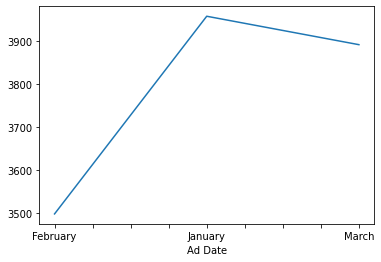

In [129]:
# Change in rents for last 3 months
ax= df.groupby([ df["Location"], df["Condition"], df['Ad Date'].dt.strftime('%B')])["Price"].mean()
ax = ax.astype({"Price": "int32"})
ax = ax.unstack()
ax_rent = ax[np.in1d(ax.index.get_level_values(1), ['Rent'])]
ax_rent

## Ploting the Data

In [25]:
# a5 is created from a2 to create plot
a5["index1"] = a5.index
a5["Percentage"] = a5["Percentage"]*100
a5 = a5.sort_values("Percentage", ascending=False)
a5

,Percentage,index1
Condition,,
Location,,
Dikili,34.506985,Dikili
Konak,27.691208,Konak
Torbalı,22.900611,Torbalı
Çeşme,22.797012,Çeşme
Foça,21.991733,Foça
Urla,20.412530,Urla
Buca,20.010758,Buca
Karaburun,19.047619,Karaburun


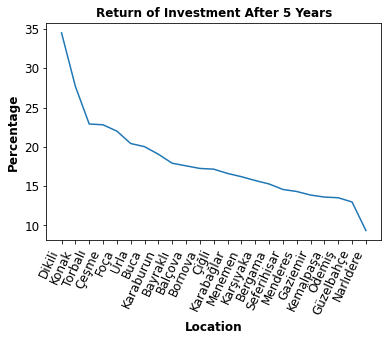

In [26]:
# Line Chart

b = a5["index1"]
c = a5["Percentage"]

# create the graph
plt.plot(c)

# label the x and y axes
plt.xlabel('Location', weight='bold', size='large')
plt.ylabel('Percentage', weight='bold', size='large')

# format the x and y ticks
plt.xticks(range(len(c)), b, rotation= 65, horizontalalignment='right', size='large')
plt.yticks(size='large')

# give it a title
plt.title("Return of Investment After 5 Years", weight='bold')

# displays the graph
plt.show()

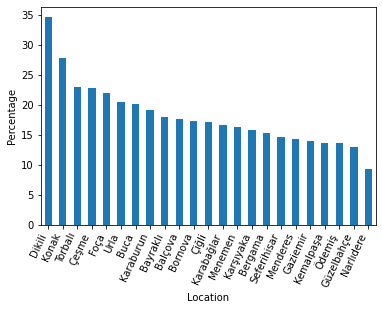

In [27]:
# Bar char
my_plot = a5.plot(kind='bar', legend=None)

# labels the x and y axes
my_plot.set_xlabel('Location')
my_plot.set_ylabel('Percentage')

# sets the labels along the x-axis as the names of each liquor
my_plot.set_xticklabels(b, rotation=65, horizontalalignment='right')

# displays the graph
plt.show()

<AxesSubplot:xlabel='Ad Date'>

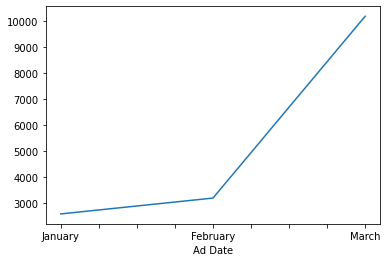

In [141]:
dikili = ax_rent.iloc[5]
dikili.reindex(['January', 'February', 'March']).plot()


## Insights 
**Dikili** has the highest percentage in return and also shows really high increase in the rents in last 3 months. So, It might be good idea to invest in **Dikili**.

## Uploading Table into BigQuery

In [ ]:
# Create dataset
def create_dataset(deneme, US):
    client = bigquery.Client()
    reference = client.dataset('Real_Estate_Investment')
    try:
        client.get_dataset(reference)
    except NotFound:
        dataset = bigquery.Dataset(reference)
        dataset.location = "US"

        dataset = client.create_dataset(dataset)

create_dataset('Real_Estate_Investment','US')


In [ ]:
# Loading to dataset
PROJECT_ID = "local-incline-341518"
client = bigquery.Client()
client.create_table(f"{PROJECT_ID}.Real_Estate_Investment.clean_data")
filename = "clean_data.csv"
dataset_id = "Real_Estate_Investment"
table_id = "clean_data"

dataset_ref = client.dataset(dataset_id)
table_ref = dataset_ref.table(table_id)
job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.CSV
job_config.autodetect = True

with open(filename, "rb") as source_file:
    job = client.load_table_from_file(source_file, table_ref, job_config=job_config)
job.result()